ValueError: Invalid RGBA argument: ['red', 'green', 'blue']

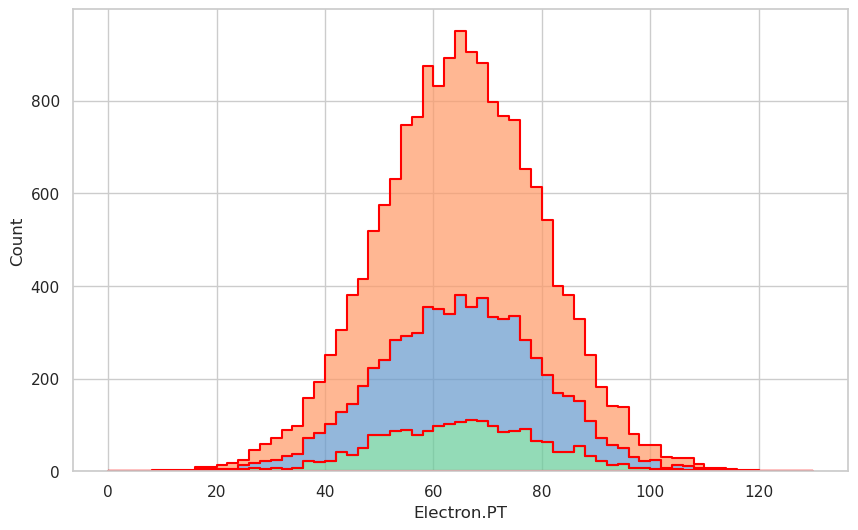

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import awkward as ak
import os

# Dummy data for demonstration
HZ4LepLFV_array = {"Electron.PT": ak.Array(np.random.normal(65, 15, 10000))}
ZWW4Lep_array = {"Electron.PT": ak.Array(np.random.normal(65, 15, 5000))}
HZ4Lep_array = {"Electron.PT": ak.Array(np.random.normal(65, 15, 2000))}

def Plot_Stacked_MatchingBorders_Step(arr1, arr2, arr3, setting):
    """
    Plots a stacked histogram using 'step' element, where each layer's border
    (the step outline) matches its fill color with consistent alpha.
    """
    desired_order = setting['labels']
    
    df1 = pd.DataFrame({setting["name"]: ak.to_numpy(arr1[setting["name"]]), 'Dataset': desired_order[0]})
    df2 = pd.DataFrame({setting["name"]: ak.to_numpy(arr2[setting["name"]]), 'Dataset': desired_order[1]})
    df3 = pd.DataFrame({setting["name"]: ak.to_numpy(arr3[setting["name"]]), 'Dataset': desired_order[2]})
    
    combined_df = pd.concat([df1, df2, df3])

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.set_theme(style="whitegrid")

    sns.histplot(
        data=combined_df,
        x=setting["name"],
        hue='Dataset',
        hue_order=desired_order,
        palette=setting['colors'],
        multiple="stack",
        bins=setting["bins"],
        binrange=setting["binrange"],
        ax=ax,
        element="step",         # Use 'step' for the outlined histogram look
        alpha=setting["alpha"], # Use your defined alpha for the fill
        linewidth=1.5,          # Make the lines visible
        edgecolor=["red","green","blue"],    # This will make the line around each step black
    )

    ax.set_title(setting['name'])
    ax.set_xlabel(setting['xlabel'])
    ax.set_ylabel("Count") 
    
    output_path = f"figure/test/Stacked_MatchingBorders_Step_{setting['name']}.png"
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    plt.savefig(output_path)
    print(f"Plot saved to {output_path}")
    plt.show()
    plt.close()

# --- Your settings dictionary ---
pc = {
    'prefix': 'Stacked_',
    'name': 'Electron.PT',
    'bins': 65,
    'binrange': (0, 130),
    'xlabel': "GeV",
    'colors': ["#FF9966", "#6699cc", "#66cc99"], # Orange, Blue, Green
    'labels': ["HZ4LepLFV", "ZWW4Lep", "HZ4Lep"],
    'alpha': 0.7 # A higher alpha makes the colors more distinct
}

# --- Call the function ---
Plot_Stacked_MatchingBorders_Step(HZ4LepLFV_array, ZWW4Lep_array, HZ4Lep_array, pc)